In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime

In [2]:
def get_first_month():
    Presupuesto = 1000000
    df = pd.read_csv('../Data/NAFTRAC_20180131.csv', skiprows=2)
    df = df.loc[:, ['Ticker', 'Peso (%)']]
    df.dropna(subset = ['Peso (%)'], inplace = True)
    df['Ticker'] = df['Ticker'].str.replace('*','')
    df['Ticker'] = df['Ticker'].str.replace('MEXCHEM','ORBIA')
    df['Ticker'] = df['Ticker'].str.replace('LIVEPOLC.1','LIVEPOLC-1')
    df['Ticker'] = df['Ticker'].str.replace('GFREGIOO','RA')
    df.set_index('Ticker', inplace = True)
    df.drop(['KOFL', 'MXN', 'BSMXB'], inplace = True)
    df_tickers = df.index.to_list()
    for i in df_tickers:
        try:
            stock = i + ".MX"
            df.loc[i,'Price'] = yf.download(stock,
                                            start='2018-01-31',
                                            progress=False
                                            ).loc[:, 'Adj Close'][0]
        except:
            pass
    
    df['Comision_por_Accion'] = df['Price'] * 0.00125
    df['Acciones'] = (Presupuesto * (df['Peso (%)']) / 100) / (df['Price'] + df['Comision_por_Accion'])
    df['Acciones'] = df['Acciones'].apply(np.floor)
    df['Capital'] = np.round(df['Acciones'] * (df['Price'] + df['Comision_por_Accion']),2)
    
    #CASH
    df.loc['CASH'] = [100 - sum(df['Peso (%)']), 0, 0, 0, ((100 - sum(df['Peso (%)'])) / 100) * Presupuesto]
    
    return df

In [3]:
get_first_month()

,Peso (%),Price,Comision_por_Accion,Acciones,Capital
Ticker,,,,,
AMXL,13.31,15.813805,0.019767,8406.0,133097.01
FEMSAUBD,12.69,168.045929,0.210057,754.0,126865.01
GFNORTEO,9.51,106.891251,0.133614,888.0,95038.08
WALMEX,7.60,43.671349,0.054589,1738.0,75995.68
GMEXICOB,7.54,53.690887,0.067114,1402.0,75368.72
CEMEXCPO,7.44,15.089149,0.018861,4924.0,74391.85
TLEVISACPO,6.21,75.351334,0.094189,823.0,62091.67
ALFAA,2.68,23.192703,0.028991,1154.0,26797.84
GAPB,2.51,166.901550,0.208627,150.0,25066.53


In [2]:
class Passive:

    def __init__(self):
        pass

    @staticmethod
    def read_file() -> pd.DataFrame:
        df = pd.read_csv('NAFTRAC_20180131.csv', skiprows=2)
        df = df.loc[:, ['Ticker', 'Peso (%)']]
        df.dropna(subset=['Peso (%)'], inplace=True)
        df['Ticker'] = df['Ticker'].str.replace('*', '')
        df['Ticker'] = df['Ticker'].str.replace('MEXCHEM', 'ORBIA')
        df['Ticker'] = df['Ticker'].str.replace('LIVEPOLC.1', 'LIVEPOLC-1')
        df['Ticker'] = df['Ticker'].str.replace('GFREGIOO', 'RA')
        df.set_index('Ticker', inplace=True)
        df.drop(['KOFL', 'MXN', 'BSMXB'], inplace=True)
        return df

    def get_historical(self) -> pd.DataFrame:
        df = self.read_file()
        df_tickers = df.index.to_list()
        historical = pd.DataFrame()
        for i in df_tickers:
            try:
                stock = i + ".MX"
                historical[i] = yf.download(stock, start='2018-01-31', progress=False).loc[:, 'Adj Close']
            except:
                pass

        holiday = ['2018-03-30', '2018-03-29']
        end_date = datetime.datetime.today()
        start_date = datetime.datetime(2018, 1, 1)
        periods = (end_date.year - start_date.year) * 12 + (end_date.month - start_date.month)
        es_holiday = pd.tseries.offsets.CustomBusinessMonthEnd(holidays=holiday)
        s = pd.date_range('2018-01-01', periods=periods, freq=es_holiday)
        historical = historical.reindex(index=s)

        return historical

    def get_passive_table(self) -> pd.DataFrame:
        historic = self.get_historical()
        historic_ = pd.DataFrame(historic.iloc[0, :])
        historic_.columns = (['Price'])
        weights = self.read_file()
        historic_ = pd.concat([historic_, weights], axis=1)
        historic_['Comision_por_Accion'] = historic_['Price'] * 0.00125
        presupuesto = 1000000
        historic_['Acciones'] = (presupuesto * (historic_['Peso (%)']) / 100) / (
                    historic_['Price'] + historic_['Comision_por_Accion'])
        historic_['Acciones'] = historic_['Acciones'].apply(np.floor)
        historic_['Capital'] = np.round(historic_['Acciones'] * (historic_['Price'] + historic_['Comision_por_Accion']),2)

        # CASH
        historic_.loc['CASH'] = [100 - sum(historic_['Peso (%)']), 0, 0, 0,
                                 ((100 - sum(historic_['Peso (%)'])) / 100) * presupuesto]

        for i in historic.columns:
            historic['Capital_' + i] = np.round(
                historic_['Acciones'][i] * (historic[i] + historic_['Comision_por_Accion'][i]), 2)

        historic['Capital_CASH'] = historic_['Capital']['CASH']
        num_acc = len(historic_) - 1
        historic['Capital_Total'] = historic.iloc[:, num_acc:].sum(axis=1)

        # Rend
        historic['Rend'] = historic['Capital_Total'].pct_change()
        historic.fillna(0, inplace=True)

        return historic#.iloc[:, -2:]

    def get_pre_pandemic(self) -> pd.DataFrame:
        df = self.get_passive_table()
        df = df.iloc[:25]
        df['Rend_accum'] = (df['Capital_Total'] - df['Capital_Total'][0]) / df['Capital_Total'][0]
        return df

    def get_in_pandemic(self) -> pd.DataFrame:
        df = self.get_passive_table()
        df = df.iloc[25:]
        df['Rend_accum'] = (df['Capital_Total'] - df['Capital_Total'][0]) / df['Capital_Total'][0]
        return df

In [7]:
Passive().get_pre_pandemic()

,Capital_Total,Rend,Rend_accum
2018-01-31,998255.56,0.000000,0.000000
2018-02-28,944080.13,-0.054270,-0.054270
2018-03-28,919758.34,-0.025762,-0.078634
2018-04-30,964951.59,0.049136,-0.033362
2018-05-31,896715.86,-0.070714,-0.101717
2018-06-29,961157.81,0.071864,-0.037163
2018-07-31,1000381.89,0.040809,0.002130
2018-08-31,1001305.99,0.000924,0.003056
2018-09-28,1000532.13,-0.000773,0.002281
2018-10-31,894043.67,-0.106432,-0.104394


In [15]:
Passive().get_in_pandemic()

,Capital_Total,Rend,Rend_accum
2020-02-28,874238.26,-0.062982,0.000000
2020-03-31,737229.15,-0.156718,-0.156718
2020-04-30,782191.59,0.060988,-0.105288
2020-05-29,776207.68,-0.007650,-0.112133
2020-06-30,809299.21,0.042632,-0.074281
2020-07-31,797142.85,-0.015021,-0.088186
2020-08-31,797616.00,0.000594,-0.087645
2020-09-30,808384.50,0.013501,-0.075327
2020-10-30,802727.34,-0.006998,-0.081798
2020-11-30,913582.12,0.138098,0.045004


In [3]:
prueba = Passive().get_historical()
prueba.head()

,AMXL,FEMSAUBD,GFNORTEO,WALMEX,GMEXICOB,CEMEXCPO,TLEVISACPO,ALFAA,GAPB,ASURB,...,MEGACPO,ALSEA,CUERVO,GENTERA,LALAB,VOLARA,LABB,RA,ALPEKA,NEMAKA
2018-01-31,15.813805,168.045929,106.891251,43.671349,53.690887,15.089149,75.351334,23.192703,166.901550,351.718445,...,76.367264,60.197136,31.968533,15.746818,25.930418,15.930000,20.450001,100.471176,26.630966,15.364382
2018-02-28,15.723131,161.565521,101.152489,41.494297,52.764084,12.135653,63.112366,22.261560,156.205917,324.345734,...,74.824867,63.539227,32.827698,14.374687,24.304502,16.780001,20.389999,100.670525,24.211769,13.258453
2018-03-28,15.641523,153.511322,99.337883,43.625599,49.648258,11.726258,56.577091,23.156401,154.070206,297.536224,...,75.300133,62.817410,34.838715,12.377166,21.769299,14.650000,19.700001,97.004257,25.044609,14.784846
2018-04-30,15.695926,168.663605,104.602890,49.398075,50.976578,11.404591,65.665817,23.872267,166.858658,326.579041,...,77.120537,69.559998,29.910313,13.954648,21.056276,11.690000,18.190001,109.200928,26.581390,13.963466
2018-05-31,14.054701,156.300140,94.931007,47.582600,41.040298,11.560551,65.498421,20.362518,145.759018,307.479340,...,77.783844,65.410004,31.060331,14.066659,19.267260,10.300000,16.900000,101.569290,29.496323,13.359801


In [19]:
%matplotlib inline
import pandas_datareader.data as web

ModuleNotFoundError: No module named 'pandas_datareader'

# Agregar Sharpe

In [21]:
ret=prueba.pct_change().dropna()
ret.head()

,AMXL,FEMSAUBD,GFNORTEO,WALMEX,GMEXICOB,CEMEXCPO,TLEVISACPO,ALFAA,GAPB,ASURB,...,MEGACPO,ALSEA,CUERVO,GENTERA,LALAB,VOLARA,LABB,RA,ALPEKA,NEMAKA
2018-02-28,-0.005734,-0.038563,-0.053688,-0.049851,-0.017262,-0.195736,-0.162425,-0.040148,-0.064083,-0.077826,...,-0.020197,0.055519,0.026875,-0.087137,-0.062703,0.053358,-0.002934,0.001984,-0.090842,-0.137066
2018-03-28,-0.005190,-0.049851,-0.017939,0.051364,-0.059052,-0.033735,-0.103550,0.040197,-0.013672,-0.082657,...,0.006352,-0.011360,0.061260,-0.138961,-0.104310,-0.126937,-0.033840,-0.036418,0.034398,0.115126
2018-04-30,0.003478,0.098705,0.053001,0.132319,0.026755,-0.027431,0.160643,0.030914,0.083004,0.097611,...,0.024175,0.107336,-0.141463,0.127451,-0.032754,-0.202048,-0.076650,0.125733,0.061362,-0.055556
2018-05-31,-0.104564,-0.073303,-0.092463,-0.036752,-0.194919,0.013675,-0.002549,-0.147022,-0.126452,-0.058484,...,0.008601,-0.059661,0.038449,0.008027,-0.084964,-0.118905,-0.070918,-0.069886,0.109661,-0.043232
2018-06-29,0.069032,0.052331,0.138916,0.045945,0.138732,0.101181,0.131832,0.127930,0.082088,0.017244,...,-0.037294,0.045712,-0.112176,0.189359,-0.057524,-0.019417,-0.018343,-0.040403,-0.006723,0.009168


In [25]:
w=[]
sharpe=[]
s=[]
er=[]
r=ret.mean()
cov=np.cov(r)
for j in range(20000): 
    a = np.random.random(len(prueba.columns))
    a /= np.sum(a)
    ren= a.dot(r)
    ss=np.sqrt(a.dot(cov).dot(a.T))
    sh=ren/ss
    w.append(a)
    s.append(ss)
    er.append(ren)
    sharpe.append(sh)

In [28]:
portfolio = {'Returns': er,
             'Volatility': s,
             'Sharpe Ratio': sharpe}
for i,j in enumerate(prueba) :
    portfolio[j+' Weight'] = [Weight[i] for Weight in w]
portfolio=pd.DataFrame(portfolio)

In [29]:
order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [j+' Weight' for j in prueba]
portfolio =portfolio[order]
portfolio

,Returns,Volatility,Sharpe Ratio,AMXL Weight,FEMSAUBD Weight,GFNORTEO Weight,WALMEX Weight,GMEXICOB Weight,CEMEXCPO Weight,TLEVISACPO Weight,...,MEGACPO Weight,ALSEA Weight,CUERVO Weight,GENTERA Weight,LALAB Weight,VOLARA Weight,LABB Weight,RA Weight,ALPEKA Weight,NEMAKA Weight
0,0.005794,0.001983,2.922566,0.044310,0.035949,0.002285,0.027665,0.049509,0.030910,0.037528,...,0.049100,0.003149,0.019866,0.047184,0.030872,0.023691,0.039465,0.019785,0.025489,0.044376
1,0.006466,0.001902,3.400353,0.047029,0.046194,0.040726,0.045593,0.028068,0.002940,0.005366,...,0.012640,0.033309,0.003325,0.018790,0.028899,0.038915,0.019037,0.034811,0.036059,0.030690
2,0.006741,0.001961,3.437261,0.001157,0.037592,0.046470,0.000136,0.047308,0.013384,0.016668,...,0.047095,0.047763,0.040989,0.040966,0.025389,0.047944,0.013779,0.025363,0.030536,0.031590
3,0.006577,0.002018,3.259652,0.049366,0.005777,0.016106,0.042359,0.034630,0.034492,0.026540,...,0.024068,0.029068,0.028607,0.047110,0.002536,0.040555,0.064862,0.012175,0.031482,0.008801
4,0.006691,0.002051,3.263142,0.051694,0.005517,0.015888,0.006865,0.029854,0.011192,0.056269,...,0.018527,0.038625,0.055276,0.056928,0.051481,0.057015,0.030782,0.008343,0.035985,0.022284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.005732,0.002098,2.731942,0.029064,0.065272,0.054255,0.002929,0.009755,0.032187,0.031630,...,0.004618,0.002322,0.021233,0.057346,0.017375,0.018163,0.002279,0.010699,0.029257,0.011359
19996,0.007459,0.001988,3.751139,0.002006,0.004580,0.009501,0.043754,0.032223,0.044055,0.003243,...,0.037793,0.043171,0.056771,0.013674,0.027658,0.053984,0.009358,0.049118,0.008359,0.016727
19997,0.007099,0.001990,3.568231,0.012870,0.006242,0.060299,0.032623,0.047882,0.028856,0.018524,...,0.053879,0.060830,0.036002,0.007710,0.025973,0.028902,0.032486,0.024654,0.058341,0.002067
19998,0.005285,0.002022,2.613925,0.004560,0.031151,0.025905,0.039864,0.046214,0.005907,0.045588,...,0.043966,0.005771,0.043127,0.051781,0.009221,0.003726,0.009987,0.037275,0.051520,0.051389


In [30]:
min_volatility = portfolio['Volatility'].min()
max_sharpe = portfolio['Sharpe Ratio'].max()

max_sharpe_port = portfolio.loc[portfolio['Sharpe Ratio'] == max_sharpe]
min_variance_port = portfolio.loc[portfolio['Volatility'] == min_volatility]

In [32]:
max_sharpe_port

,Returns,Volatility,Sharpe Ratio,AMXL Weight,FEMSAUBD Weight,GFNORTEO Weight,WALMEX Weight,GMEXICOB Weight,CEMEXCPO Weight,TLEVISACPO Weight,...,MEGACPO Weight,ALSEA Weight,CUERVO Weight,GENTERA Weight,LALAB Weight,VOLARA Weight,LABB Weight,RA Weight,ALPEKA Weight,NEMAKA Weight
13791,0.011096,0.002141,5.181375,0.01613,0.001394,0.042734,0.067011,0.054563,0.059697,0.005452,...,0.009205,0.025346,0.034104,0.022287,0.030047,0.067672,0.037988,0.058247,0.027555,0.000453


In [33]:
min_variance_port

,Returns,Volatility,Sharpe Ratio,AMXL Weight,FEMSAUBD Weight,GFNORTEO Weight,WALMEX Weight,GMEXICOB Weight,CEMEXCPO Weight,TLEVISACPO Weight,...,MEGACPO Weight,ALSEA Weight,CUERVO Weight,GENTERA Weight,LALAB Weight,VOLARA Weight,LABB Weight,RA Weight,ALPEKA Weight,NEMAKA Weight
11984,0.006608,0.001813,3.645351,0.014668,0.016856,0.032385,0.025231,0.022977,0.038998,0.028915,...,0.01898,0.045722,0.035784,0.044026,0.025781,0.028672,0.021219,0.02636,0.043512,0.035824


In [36]:
wp = np.linspace(0,1.5,50)
rf=.0158
eMVP=min_variance_port.iat[0,0]
sMVP=min_variance_port.iat[0,1]
LAC = pd.DataFrame(index=range(len(wp)),
                   data={'wp':wp,
                        'wrf':1-wp,
                        'Returns':wp*eMVP+(1-wp)*rf,
                        'Volatility':wp*sMVP})
LAC['RS'] = (LAC['Returns']-rf)/LAC['Volatility']
LAC

,wp,wrf,Returns,Volatility,RS
0,0.000000,1.000000,0.015800,0.000000,NaN
1,0.030612,0.969388,0.015519,0.000055,-5.070401
2,0.061224,0.938776,0.015237,0.000111,-5.070401
3,0.091837,0.908163,0.014956,0.000166,-5.070401
4,0.122449,0.877551,0.014674,0.000222,-5.070401
5,0.153061,0.846939,0.014393,0.000277,-5.070401
6,0.183673,0.816327,0.014112,0.000333,-5.070401
7,0.214286,0.785714,0.013830,0.000388,-5.070401
8,0.244898,0.755102,0.013549,0.000444,-5.070401
9,0.275510,0.724490,0.013268,0.000499,-5.070401


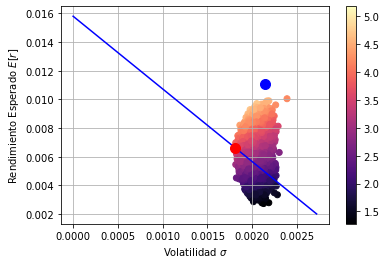

In [37]:
plt.figure(figsize=(6,4))
plt.scatter(portfolio['Volatility'],portfolio['Returns'],c=portfolio['Sharpe Ratio'],cmap='magma')
plt.plot(LAC['Volatility'],LAC['Returns'],'-b')
plt.plot(min_variance_port['Volatility'],min_variance_port['Returns'],'or',ms=10, label='Port Min Variance')
plt.plot(max_sharpe_port['Volatility'],max_sharpe_port['Returns'],'ob',ms=10, label='Port Max Sharpe')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento Esperado $E[r]$')
plt.colorbar()
plt.grid()

In [84]:
weights = Passive().read_file()
cols = prueba.columns
for i in cols:
    prueba["rend_" + i] = prueba[i].pct_change()
    prueba['Weight_' + i] = weights.loc[i, 'Peso (%)']

prueba.fillna(0, inplace=True)
prueba.head()

,AMXL,FEMSAUBD,GFNORTEO,WALMEX,GMEXICOB,CEMEXCPO,TLEVISACPO,ALFAA,GAPB,ASURB,...,rend_VOLARA,Weight_VOLARA,rend_LABB,Weight_LABB,rend_RA,Weight_RA,rend_ALPEKA,Weight_ALPEKA,rend_NEMAKA,Weight_NEMAKA
2018-01-31,15.813805,168.045929,106.891251,43.671349,53.690887,15.089149,75.351334,23.192703,166.901550,351.718445,...,0.000000,0.46,0.000000,0.43,0.000000,0.42,0.000000,0.32,0.000000,0.3
2018-02-28,15.723131,161.565521,101.152489,41.494297,52.764084,12.135653,63.112366,22.261560,156.205917,324.345734,...,0.053358,0.46,-0.002934,0.43,0.001984,0.42,-0.090842,0.32,-0.137066,0.3
2018-03-28,15.641523,153.511322,99.337883,43.625599,49.648258,11.726258,56.577091,23.156401,154.070206,297.536224,...,-0.126937,0.46,-0.033840,0.43,-0.036418,0.42,0.034398,0.32,0.115126,0.3
2018-04-30,15.695926,168.663605,104.602890,49.398075,50.976578,11.404591,65.665817,23.872267,166.858658,326.579041,...,-0.202048,0.46,-0.076650,0.43,0.125733,0.42,0.061362,0.32,-0.055556,0.3
2018-05-31,14.054701,156.300140,94.931007,47.582600,41.040298,11.560551,65.498421,20.362518,145.759018,307.479340,...,-0.118905,0.46,-0.070918,0.43,-0.069886,0.42,0.109661,0.32,-0.043232,0.3


lista = []
for j in range(1, len(base['AMXL'])):
    if prueba.iloc[j].loc["rend_AMXL"] >= 0.05:
        lista.append(prueba.iloc[j - 1].loc['Weight_AMXL'] * 1.025)
    if prueba.iloc[j].loc["rend_AMXL"] <= -0.05:
        lista.append(prueba.iloc[j - 1].loc['Weight_AMXL'] * 0.975)
    else:
        lista.append(lista[:-1])

lista

In [89]:
base = prueba.copy()
base.reset_index(inplace = True)
for i in cols:
    for j in range(1, len(base['AMXL'])):
        if base.loc[j, "rend_" + i] >= 0.05:
            base.loc[j, 'Weight_' + i] = base.loc[j - 1, 'Weight_' + i] * 1.025
        elif base.loc[j, "rend_" + i] <= -0.05:
            base.loc[j, 'Weight_' + i] = base.loc[j - 1, 'Weight_' + i] * 0.975
        else:
            base.loc[j, 'Weight_' + i] = base.loc[j - 1, 'Weight_' + i]

base.head(15)

,index,AMXL,FEMSAUBD,GFNORTEO,WALMEX,GMEXICOB,CEMEXCPO,TLEVISACPO,ALFAA,GAPB,...,rend_VOLARA,Weight_VOLARA,rend_LABB,Weight_LABB,rend_RA,Weight_RA,rend_ALPEKA,Weight_ALPEKA,rend_NEMAKA,Weight_NEMAKA
0,2018-01-31,15.813805,168.045929,106.891251,43.671349,53.690887,15.089149,75.351334,23.192703,166.901550,...,0.000000,0.460000,0.000000,0.430000,0.000000,0.420000,0.000000,0.320000,0.000000,0.300000
1,2018-02-28,15.723131,161.565521,101.152489,41.494297,52.764084,12.135653,63.112366,22.261560,156.205917,...,0.053358,0.471500,-0.002934,0.430000,0.001984,0.420000,-0.090842,0.312000,-0.137066,0.292500
2,2018-03-28,15.641523,153.511322,99.337883,43.625599,49.648258,11.726258,56.577091,23.156401,154.070206,...,-0.126937,0.459712,-0.033840,0.430000,-0.036418,0.420000,0.034398,0.312000,0.115126,0.299812
3,2018-04-30,15.695926,168.663605,104.602890,49.398075,50.976578,11.404591,65.665817,23.872267,166.858658,...,-0.202048,0.448220,-0.076650,0.419250,0.125733,0.430500,0.061362,0.319800,-0.055556,0.292317
4,2018-05-31,14.054701,156.300140,94.931007,47.582600,41.040298,11.560551,65.498421,20.362518,145.759018,...,-0.118905,0.437014,-0.070918,0.408769,-0.069886,0.419737,0.109661,0.327795,-0.043232,0.292317
5,2018-06-29,15.024928,164.479462,108.118431,49.768772,46.733887,12.730253,74.133194,22.967489,157.724075,...,-0.019417,0.437014,-0.018343,0.408769,-0.040403,0.419737,-0.006723,0.327795,0.009168,0.292317
6,2018-07-31,14.757691,171.897263,120.022835,51.736332,48.565449,13.539296,72.962883,25.214527,151.059662,...,0.354455,0.447940,-0.103677,0.398550,0.062641,0.430231,0.067344,0.335990,0.128582,0.299625
7,2018-08-31,14.831616,172.047684,120.854012,50.364017,47.127899,13.188386,67.799721,24.985844,176.300232,...,0.020468,0.447940,0.112307,0.408513,0.035210,0.430231,-0.106214,0.327590,0.039063,0.299625
8,2018-09-28,13.898289,174.059601,124.954521,54.306290,45.386475,12.808233,65.439415,23.991579,182.860977,...,0.007163,0.447940,-0.009069,0.408513,0.004006,0.430231,0.082653,0.335780,-0.119475,0.292134
9,2018-10-31,13.593339,162.674362,103.214462,49.402256,39.430290,9.883979,57.591408,21.287182,150.209152,...,-0.116643,0.436741,-0.203783,0.398300,-0.160044,0.419475,-0.123853,0.327385,0.053419,0.299438


El paso que sigue es tener otro df de pesos, en los cuales se vaya poniendo por fecha cada uno de los pesos en todas las acciones.

- Disminuir en un 2.5% la posición en títulos de aquellos activos cuyo precio disminuyó un 5% o más
- Aumentar en un 2.5% la posición en títulos de aquellos activos cuyo precio aumentó un 5% o más

Siguientes pasos: 
- Agregar CASH
- Calcular el número de acciones
- Calcular comisiones
- Calcular capital
- Calcular rendimientos